In [224]:
import numpy as np
import copy

## Preparing Data

In [225]:
N = 100
D = 2

In [226]:
X = np.random.randn(N,D)
X[:N/2,:]= X[:N/2,:] - 2*np.ones((N/2,D))
X[N/2:,:]= X[N/2:,:] + 2*np.ones((N/2,D))
ones = np.array([[1]]*N)
X2 = np.concatenate((ones,X), axis=1)

In [227]:
T=np.array([0]*(N/2)+[1]*(N/2))
W = np.random.randn(D+1)
Z = X2.dot(W)

## Sigmoid Funtion

In [228]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
    
Y = sigmoid(Z)
print Y

[ 0.96139134  0.99250779  0.99074411  0.7796903   0.99808471  0.98298253
  0.9860628   0.99861992  0.97621759  0.95965048  0.99468992  0.98955832
  0.99235348  0.99364056  0.98942033  0.99509985  0.99255607  0.99243804
  0.9963658   0.98732298  0.99323203  0.998319    0.97847291  0.91392785
  0.93245862  0.99445738  0.9880884   0.97627771  0.99202692  0.99906326
  0.99244389  0.99446575  0.99933172  0.99886423  0.98481707  0.99926732
  0.99384017  0.99632836  0.94610583  0.89467756  0.96709571  0.93429374
  0.9995423   0.99387609  0.98775308  0.99584192  0.99971698  0.98623278
  0.99683151  0.99852645  0.08128057  0.00480058  0.03466625  0.27718621
  0.05710115  0.05415736  0.03749124  0.00925207  0.09847303  0.02851376
  0.01904375  0.00747106  0.17202603  0.05027327  0.06282442  0.08919834
  0.01831847  0.00457178  0.01544584  0.06169064  0.0098593   0.13262301
  0.06474935  0.05370902  0.03106109  0.1513836   0.12698132  0.02725777
  0.06185974  0.01862442  0.01017703  0.09972044  0

## Cross Entropy
It is the objective function used in Logistic regression.

In [229]:
def cross_entropy(T,Y):
    E = 0
    for i in xrange(N):        
        if(T[i] == 1):
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
            
    return E

In [230]:
print cross_entropy(T,Y)

405.52027802


## The Closed Form Solution
This solution is used for X that are Gaussian distributed.
In this problem, the Class = 0 data is Gaussian distributed with mean1 = [1,2,2] and Class = 1 data with mean2 =[1, -2, -2]. Closed form solution gives the optimum weight = Mean1 - Mean2

In [231]:
w_cf= np.array([0,4,4])
z_cf= X2.dot(w_cf)
y_cf= sigmoid(z_cf)
print cross_entropy(T,y_cf)

0.167141182457


# Closed form Solution error
This is really amazing. Prediction using #closed form solution# is so accurate that the error is negligible.
# Plotting X

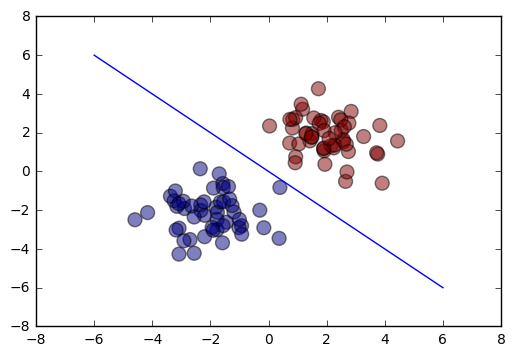

In [232]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = T, alpha=0.5, s=100)
x_axis = np.linspace(-6,6,100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

# Learning the weights, Gradient Descent

In [233]:
learning_rate = 0.1
W_grad = copy.deepcopy(W)
Y_grad = copy.deepcopy(Y)
for i in xrange(100):
    if i%10 == 0:
        print(cross_entropy(T,Y_grad))
        
    W_grad += learning_rate * X2.T.dot(T-Y_grad)
    Y_grad = sigmoid(X2.dot(W_grad))
    
print W_grad

405.52027802
0.000600873196037
0.000600210726283
0.000599549715285
0.000598890158231
0.000598232050329
0.000597575386811
0.000596920162926
0.000596266373947
0.000595614015166
[  0.37364535  18.75114354  18.24416741]


# L2 Regularization

Existing cost/objective function  J = -(t x log(y) + (1-t)log(1-y)).
It is practically found that the cost function decreases as we multiply the weights of the same linear classifier.

In the above example, the final/optimum weights are [0,4,4].
So our classifier is 4x=-4y.

The above classifier is same as x=-y, whose weight matrix is [0,1,1].

But J([0,infinity,infinity]) < J([0,8,8])< J([0,4,4])< J([0,1,1]).

But for infinity, our computer give error. So, our cost function should return weights close to zero.
So we penalize higher weights. We add a regularization_cost = lambda(|w|.square) to the cost function, were lambda is the regularization constant.

Jreg = -(t x log(y) + (1-t)log(1-y)) + lambda(|w|.square) --- (1)

Jreg is the "Maximum A posteriori" of weight W
Jreg = log(P(W|X,Y)) --- (2)

(1) and (2) => P(W|X,Y) = y.exp(t) + (1-y).exp(1-t) + e.exp(-lambda x |w|.square)

It implies that, P(W|X,Y) = P(X,Y|W) x P(W)
Which means, Jreg assumes a bernauli distribution for the data and a prior distribution of normal(mean=0, lambda) for the weights

In [234]:
learning_rate = 0.1
W_reg = copy.deepcopy(W)
Y_reg = copy.deepcopy(Y)
for i in xrange(100):
    if i%10 == 0:
        print(cross_entropy(T,Y_reg))
        
    W_reg += learning_rate * X2.T.dot(T-Y_reg) - .1*W_reg
    Y_reg = sigmoid(X2.dot(W_reg))
    
print W_reg

405.52027802
0.0516201529173
0.363155655234
1.4548120813
1.50605032523
1.50682002655
1.50685663717
1.50685840765
1.50685847739
1.50685847814
[-0.07414976  1.41719932  1.4241804 ]


We can see, normalization gives small value of W